# Speciation calculation for EuT versus pH for fixed DOC values

The code blocks are hiddden but to reveal them click on the 3 dots.  These blocks can be modified. changes will be saved on the cloud computer.  But I will need to use git to upload back to the source github.


In [634]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-8);
PHREEQCpath=[rootpath,'runPHREEQC'];
addpath(PHREEQCpath);
% clear data and number format
clear; format short e

% turn off warnings
warning off

In [635]:
% inputs
logEuT=-9:1:-3; EuT=10.^logEuT; NO3T=3*EuT; 
pHvector=2:1:12;
ClT=0.578e-3; SO4T=0.25e-3; CaT=0.25e-3; MgT=0.25e-3; NaT=(0.078e-3)*2; %just count extra K as Na (only comes into ionic strength calc)
CT=1e-13; % set low amount of inorganic carbon (1e-13)  can't set to zero.  set higher for carbonate media (1e-3)
DOC=input("total dissolved organic carbon (mg C/L)?"); if DOC==0; DOC=1e-5; end
HAconc=(2*DOC)/1000; % convert to g HA/L
ionicstrength=0.5*(NaT+4*CaT+4*MgT+4*SO4T+ClT);
T=25; pevector=20.75-pHvector; acid=['NaOH'];

total dissolved organic carbon (mg C/L)? 2


In [636]:
function [II,GG]=SURFACES

II=[...
3.70E-04
3.70E-04
3.70E-04
3.70E-04
1.85E-04
1.85E-04
1.85E-04
1.85E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-05
1.91E-05
1.91E-05
1.91E-05
1.91E-05
1.91E-05
1.91E-06
1.91E-06
1.91E-06
1.91E-06
1.91E-06
1.91E-06
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
];

GG=[...
{'Ha_aH'}
{'Ha_bH'}
{'Ha_cH'}
{'Ha_dH'}
{'Ha_eH'}
{'Ha_fH'}
{'Ha_gH'}
{'Ha_hH'}
{'Ha_abH2'}
{'Ha_cdH2'}
{'Ha_aeH2'}
{'Ha_bfH2'}
{'Ha_cgH2'}
{'Ha_dhH2'}
{'Ha_abxH2'}
{'Ha_cdxH2'}
{'Ha_aexH2'}
{'Ha_bfxH2'}
{'Ha_cgxH2'}
{'Ha_dhxH2'}
{'Ha_abxxH2'}
{'Ha_cdxxH2'}
{'Ha_aexxH2'}
{'Ha_bfxxH2'}
{'Ha_cgxxH2'}
{'Ha_dhxxH2'}
{'Ha_abeH3'}
{'Ha_abfH3'}
{'Ha_abgH3'}
{'Ha_abhH3'}
{'Ha_cdeH3'}
{'Ha_cdfH3'}
{'Ha_cdgH3'}
{'Ha_cdhH3'}
{'Ha_abeyH3'}
{'Ha_abfyH3'}
{'Ha_abgyH3'}
{'Ha_abhyH3'}
{'Ha_cdeyH3'}
{'Ha_cdfyH3'}
{'Ha_cdgyH3'}
{'Ha_cdhyH3'}
{'Ha_abeyyH3'}
{'Ha_abfyyH3'}
{'Ha_abgyyH3'}
{'Ha_abhyyH3'}
{'Ha_cdeyyH3'}
{'Ha_cdfyyH3'}
{'Ha_cdgyyH3'}
{'Ha_cdhyyH3'}
];

end

In [637]:
function II=exportspecies(REE)

II=[...
   {'Ha_aREE+2'}
{'Ha_bREE+2'}
{'Ha_cREE+2'}
{'Ha_dREE+2'}
{'Ha_eREE+2'}
{'Ha_fREE+2'}
{'Ha_gREE+2'}
{'Ha_hREE+2'}
{'Ha_abREE+'}
{'Ha_cdREE+'}
{'Ha_aeREE+'}
{'Ha_bfREE+'}
{'Ha_cgREE+'}
{'Ha_dhREE+'}
{'Ha_abxREE+'}
{'Ha_cdxREE+'}
{'Ha_aexREE+'}
{'Ha_bfxREE+'}
{'Ha_cgxREE+'}
{'Ha_dhxREE+'}
{'Ha_abxxREE+'}
{'Ha_cdxxREE+'}
{'Ha_aexxREE+'}
{'Ha_bfxxREE+'}
{'Ha_cgxxREE+'}
{'Ha_dhxxREE+'}
{'Ha_abeREE'}
{'Ha_abfREE'}
{'Ha_abgREE'}
{'Ha_abhREE'}
{'Ha_cdeREE'}
{'Ha_cdfREE'}
{'Ha_cdgREE'}
{'Ha_cdhREE'}
{'Ha_abeyREE'}
{'Ha_abfyREE'}
{'Ha_abgyREE'}
{'Ha_abhyREE'}
{'Ha_cdeyREE'}
{'Ha_cdfyREE'}
{'Ha_cdgyREE'}
{'Ha_cdhyREE'}
{'Ha_abeyyREE'}
{'Ha_abfyyREE'}
{'Ha_abgyyREE'}
{'Ha_abhyyREE'}
{'Ha_cdeyyREE'}
{'Ha_cdfyyREE'}
{'Ha_cdgyyREE'}
{'Ha_cdhyyREE'}
];

for i=1:length(II)
    str=II(i);
    newStr=strrep(str,'REE',REE);
    II(i)=newStr;
end

In [638]:
% setup equilibrium for PHREEQC inputs
totalnames=[{'Eu'}; {'Na'}; {'Cl'}; {'N(+5)'}; {'C(+4)'}; {'S(6)'}; {'Ca'}; {'Mg'}]; 
minerals=[...
    {'Eu(OH)3'}; ...
    {'Eu2(CO3)3:3H2O'}; ...
    {'Eu(NO3)3:6H2O'}; ...
    {'Eu(OH)2.5Cl.5'}; ...
    {'Eu(OH)2Cl'}; ...
    {'Eu2O3(cubic)'}; ...
    {'Eu2O3(monoclinic)'}; ...
    {'EuOCl'}; ...
    {'EuCl3'}; ...
    {'EuOHCO3'}; ...
    {'Calcite'}; ...
    {'Dolomite(disordered)'}; ...
    {'Magnesite'}];% {'EuPO4:10H2O'}]; 
speciesexport=exportspecies(totalnames(1));
DOC>0; speciesexport(51,1)={'Eu+3'};
[surfaceconcs,SURFACENAMES]=SURFACES; 
SURFACECONCS=HAconc*surfaceconcs;
dummysurfacearea=1e6;
database=['Marsac2017EuIIIsolids.dat']; show=0; %0 no output to screen. 1 output to screen

In [639]:
% run a loop over pH and over EuT

for ii=1:length(EuT)
    totalvector=[EuT(ii); NaT; ClT; NO3T(ii); CT; SO4T; CaT; MgT];
    for jj=1:length(pHvector)
        [solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
        runPHREEQCv2(T,pHvector(jj),pevector(jj),HAconc,totalnames,totalvector,minerals,...
        SURFACECONCS,SURFACENAMES,speciesexport,ionicstrength,dummysurfacearea,database,show,acid);
        
        %convert phreeqc variable names for solids to matlab permissible names. set
        %solid concs as variable names
        for i=1:length(solidconcs)
             tst=cell2mat(solidnames(i));
             for j=1:length(tst)
                 if tst(j)=='('; tst(j)='L'; end
                 if tst(j)==')'; tst(j)='R'; end
                 if tst(j)==':'; tst(j)='C'; end
                 if tst(j)=='.'; tst(j)='p'; end
             end
             txt=[tst,'=solidconcs(i);']; eval(txt); % take out the semicolon after (i) if you want to see the solids listed with concs
        end

        organicbound(ii,jj)=sum(solutionspeciesconcs(1:50)); 
        if DOC==0; organicbound(ii,jj)=0; end
        %EuLOHR3=0;
        solidbound(ii,jj)=EuLOHR3+2*Eu2LCO3R3C3H2O+EuLNO3R3C6H2O+Eu2O3LcubicR+Eu2O3LmonoclinicR+EuOHCO3;
        inorganicbound(ii,jj)=EuT(ii)-organicbound(ii,jj)-solidbound(ii,jj);
    end
end

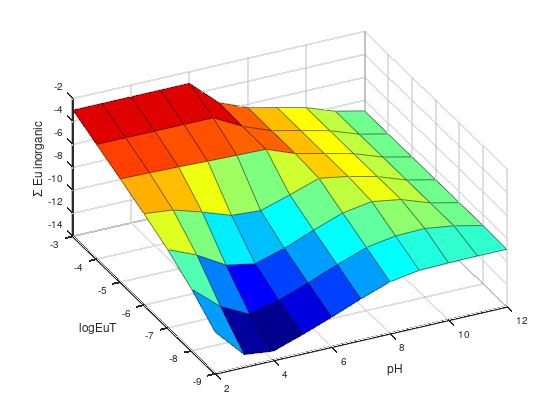

In [640]:
% now graph it
 %graphics_toolkit ("plotly"); 
  graphics_toolkit ("notebook"); 
 colormap('jet'); shading interp
 h=surf(pHvector,logEuT,log10(inorganicbound));
 set(gca,'linewidth',2)
 view([-26 48])
 h=xlabel('pH'); set(h,'fontsize',12)
 h=ylabel('logEuT');  set(h,'fontsize',12)
 h=zlabel('\Sigma Eu inorganic'); set(h,'fontsize',12)
 

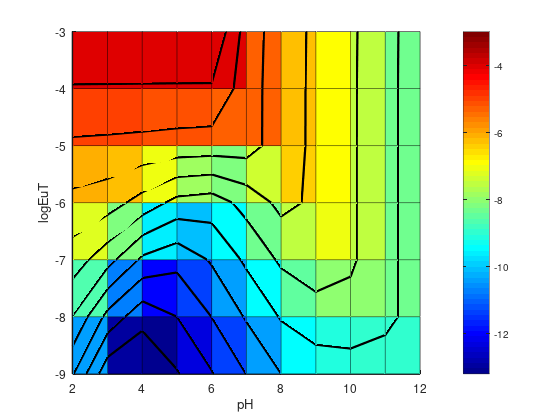

In [641]:
% plot as a contour
 %graphics_toolkit ("plotly"); 
  graphics_toolkit ("notebook"); 
  colormap('jet'); shading interp
  h=surf(pHvector,logEuT,log10(inorganicbound));
  set(gca,'linewidth',2)
  view([0 90])
  h=xlabel('pH'); set(h,'fontsize',12)
  h=ylabel('logEuT');  set(h,'fontsize',12)
  hold on; [C,h]=contour3(pHvector,logEuT,log10(inorganicbound),10,'k'); set(h,'linewidth',2); 
  set(gca,'linewidth',2,'fontsize',12)
  colorbar   

In [643]:
% input data to plot on the same graph

EuT=[0.1256 0.2499 0.3791 0.4653 0.1415 0.2780 0.4276 0.6090]; % mg Eu/L
pH=[7.15 7.42 7.67 7.79 10.92 11.03 10.90 10.97];
Eudiss=[0.115 0.231 0.22 0.1707 0.1052 0.1517 0.2082 0.1695]; %mg Eu/L
EuMM=151.964; EuT=(EuT*1e-3)./EuMM; Eudiss=(Eudiss*1e-3)./EuMM;

  %graphics_toolkit ("plotly"); 
  graphics_toolkit ("notebook");
  h2=plot3(pH,log10(EuT),log10(Eudiss),'ko','markersize',8,'markerfacecolor','k');
  hold on
  colormap('jet'); %shading interp
  h=surf(pHvector,logEuT,log10(inorganicbound));
  set(h,'facealpha',0.2)
  set(gca,'linewidth',2)
  view([-26 48])
  h=xlabel('pH'); set(h,'fontsize',12)
  h=ylabel('logEuT');  set(h,'fontsize',12)
  h=zlabel('\Sigma Eu inorganic'); set(h,'fontsize',12)
  hold on
  plot3(pH,log10(EuT),log10(Eudiss),'ko','markersize',8,'markerfacecolor','k')